## Interpretability of Gene Subspaces as Biological Processes

In this tutorial, we explore how to interpret the biological meaning of what the ``ggml_ot`` model has learned. After training the model on gene data, we want to figure out what each axis in the new space means, i.e. which genes are important and what biological processes they might be related to.

We will show how to:
- Identify the most influential genes in each axis
- Perform gene enrichment analysis
- Visualize cells in the learned subspace


In [1]:
# import ggml_ot and remaining packages
import sys
sys.path.insert(0, '../src/')
import ggml_ot
import scanpy as sc

/home/ja205610/ggml-ot_privat/.venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


3.2603794306105125e-15


Load the data (Myocardial Infarction dataset from Kuppe et. al, 2022) and train the model as before.

In [2]:
id = "c1f6034b-7973-45e1-85e7-16933d0550bc.h5ad"
adata = ggml_ot.download_cellxgene(id, load=True)

train_dataset = ggml_ot.scRNA_Dataset(adata, n_cells=250, patient_col="sample", label_col="patient_group", subsample_patient_ratio=0.75, t=3, verbose=False)
trained_adata = ggml_ot.ggml(train_dataset, a=10, l=1, k=5, loss="cos", adata=adata, verbose=False)

data/c1f6034b-7973-45e1-85e7-16933d0550bc.h5ad already exists
keeping 7777 high variable genes


### Gene importance

With the function ``genes.importance()`` we analyze which genes contribute most strongly to each axis of the learned gene subspace. These genes can help us interpret what biological processes each axis might represent.

In our example, we want to find out the ten most important genes in each component.

Component 0


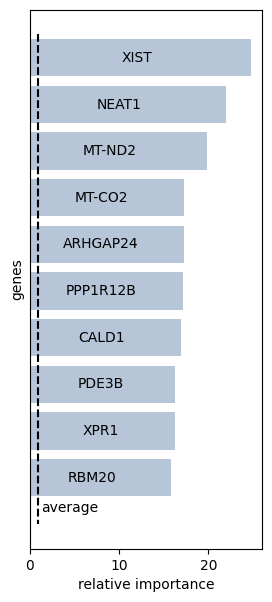

Component 1


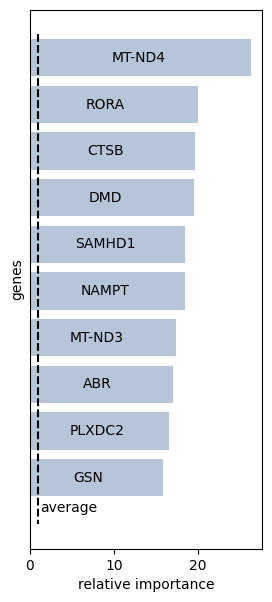

Component 2


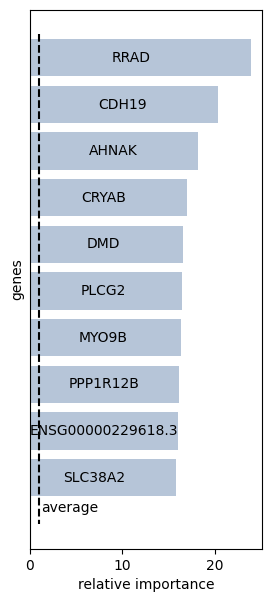

Component 3


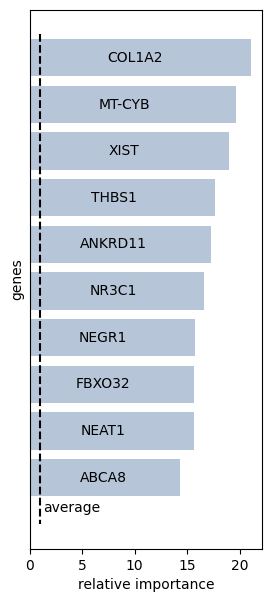

Component 4


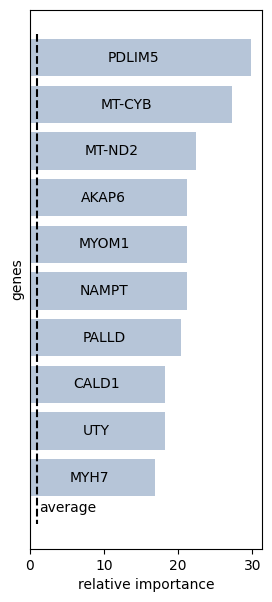

In [3]:
# Interpretability of axes of learned gene subspace
import ggml_ot.genes

_ = ggml_ot.genes.importance(trained_adata, n_top_genes=10)

### Gene enrichment


With ``genes.enrichment()``, we take the most important genes from each axis and check if they are linked to known biological processes. This step helps us understand what kind of functions each axis might relate to.

In the following, we extract the 50 most impotant genes of each component and perform gene enrichment analysis.

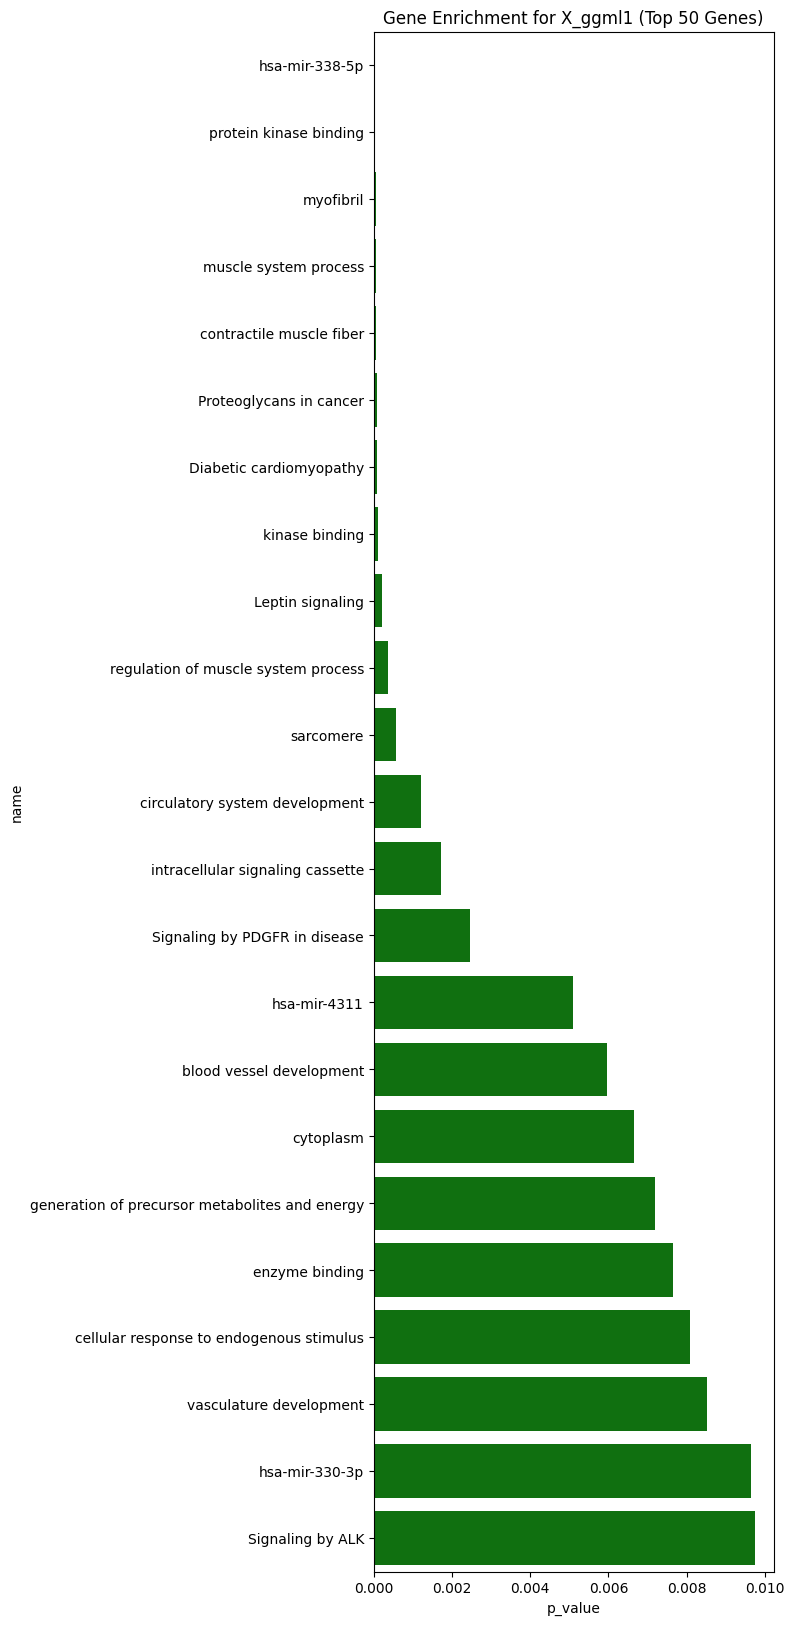

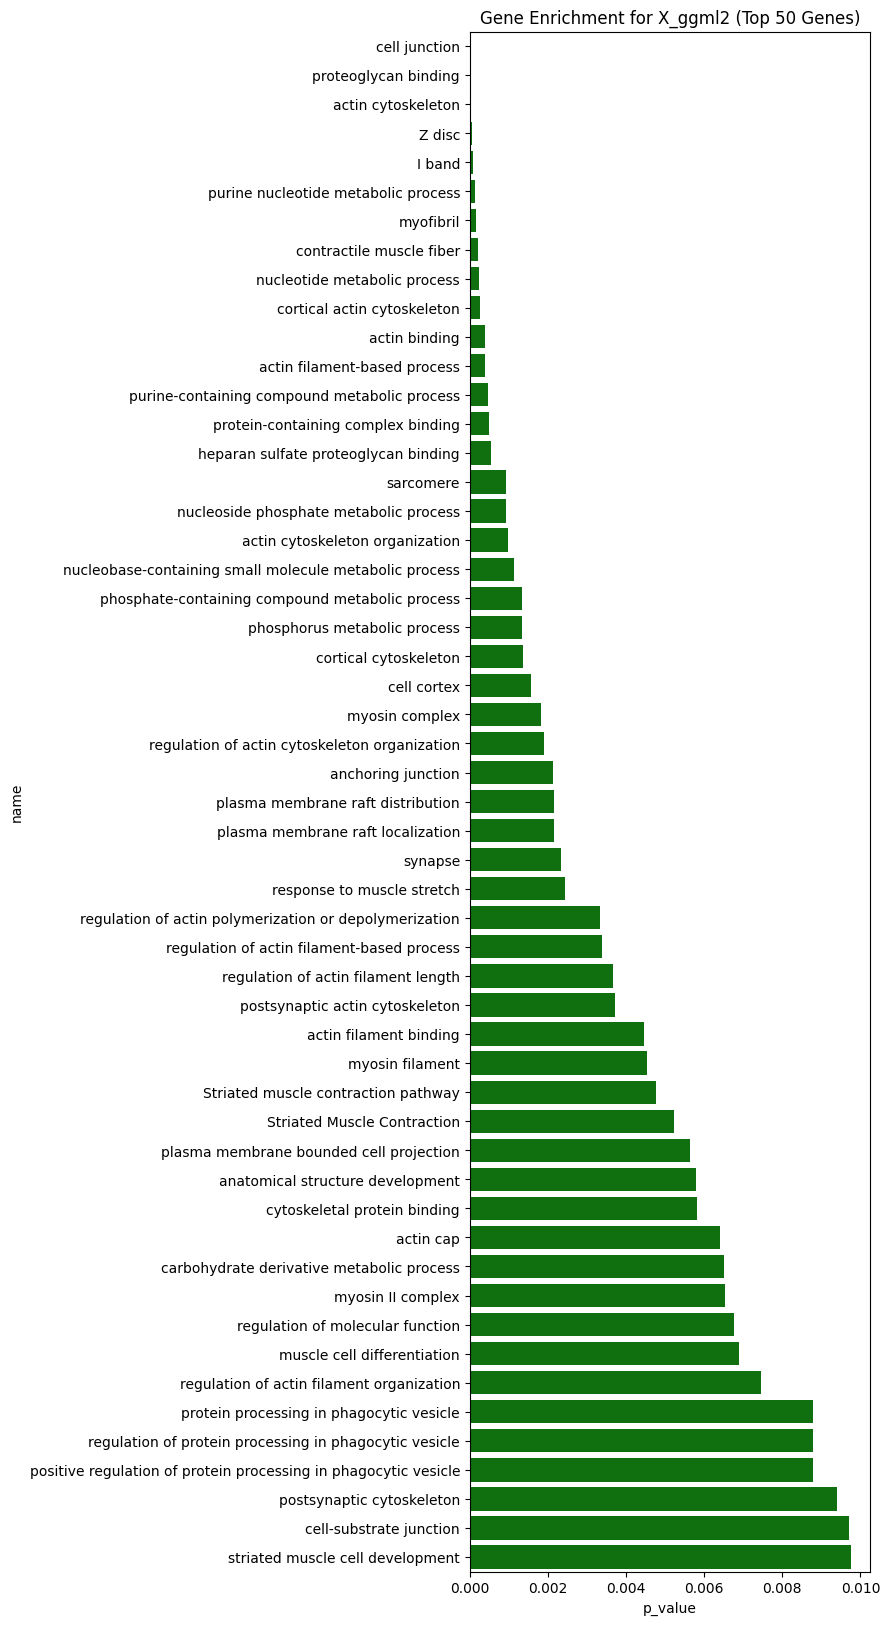

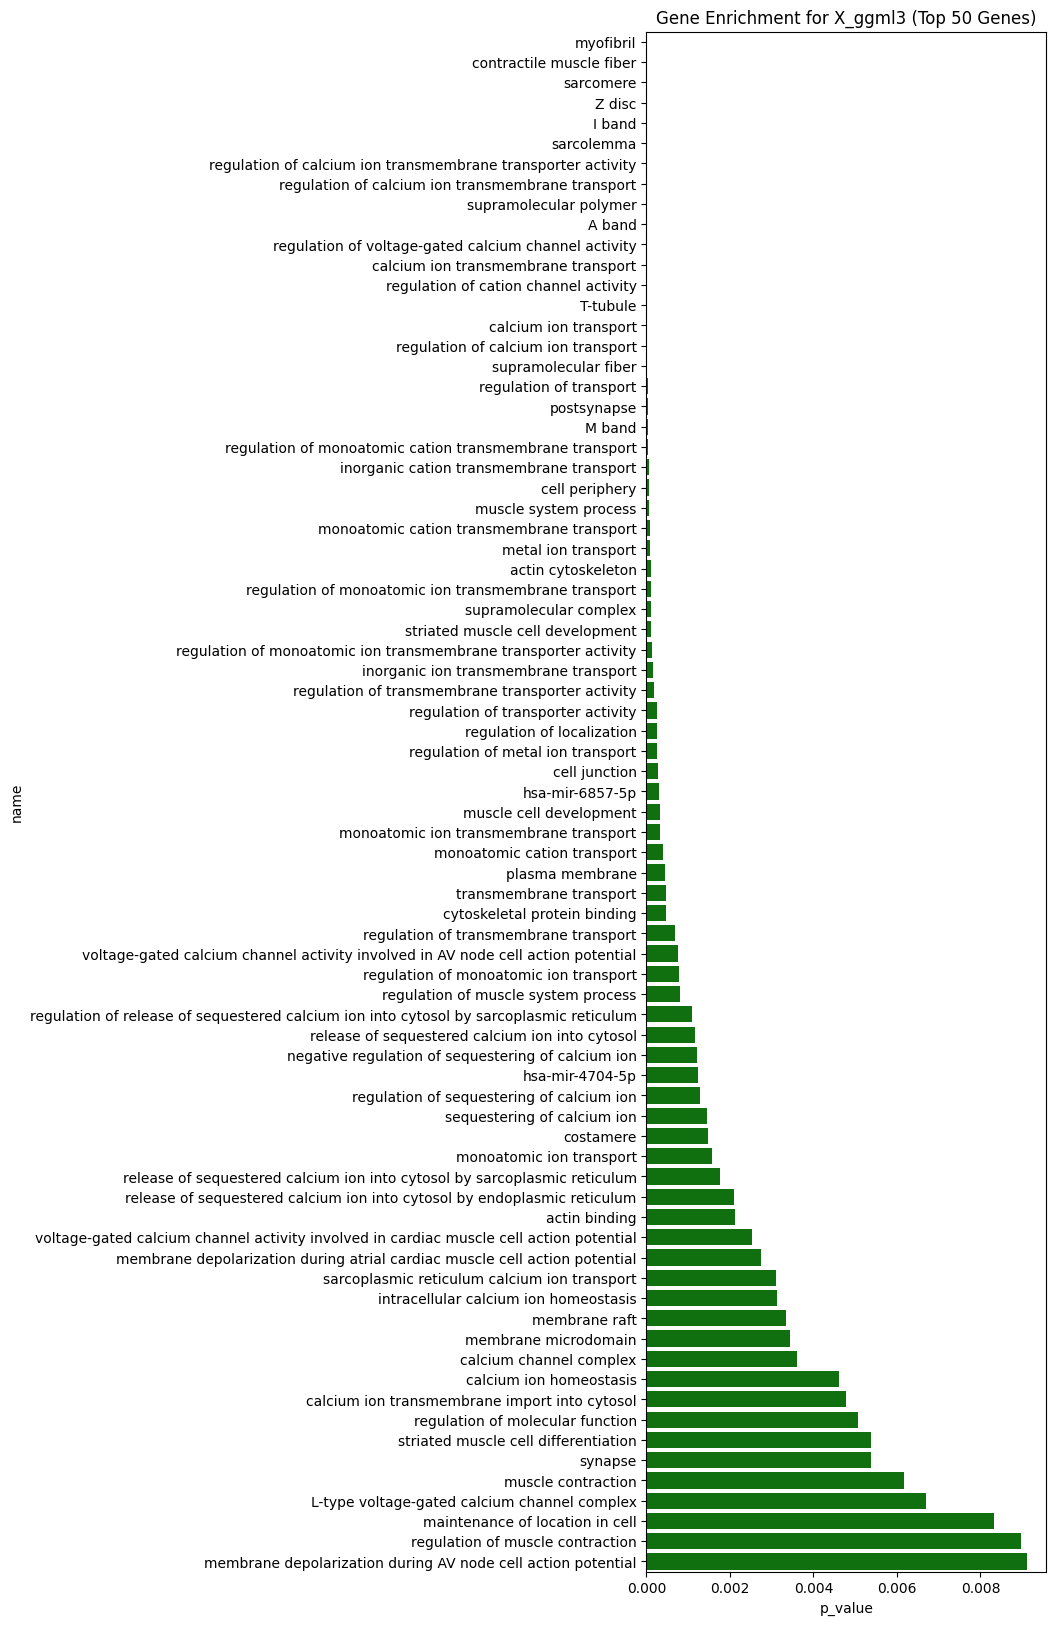

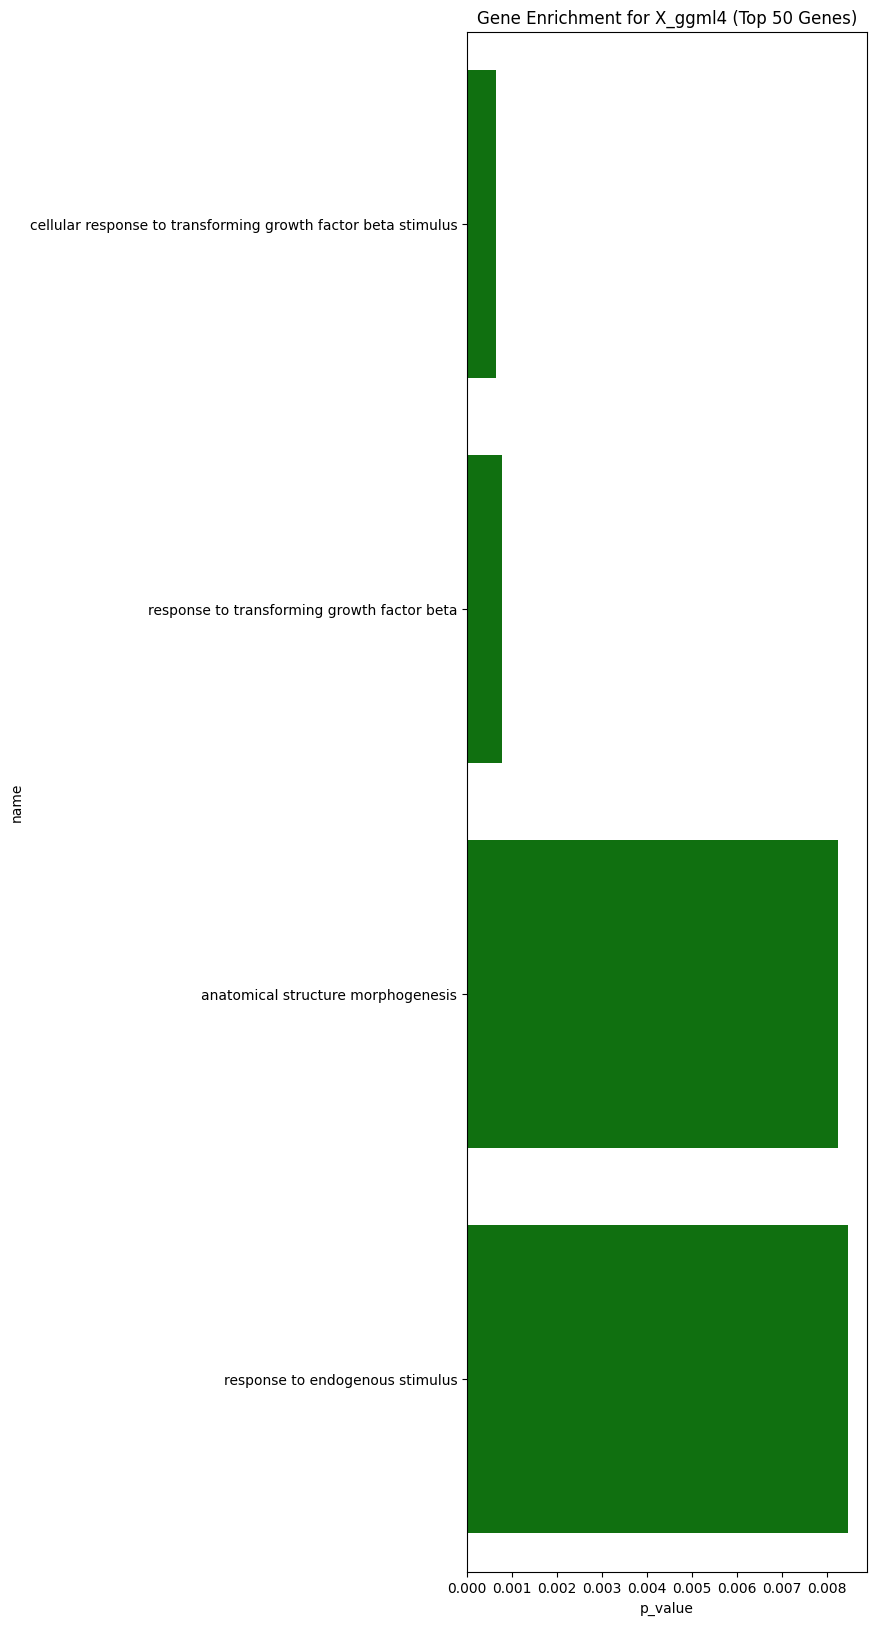

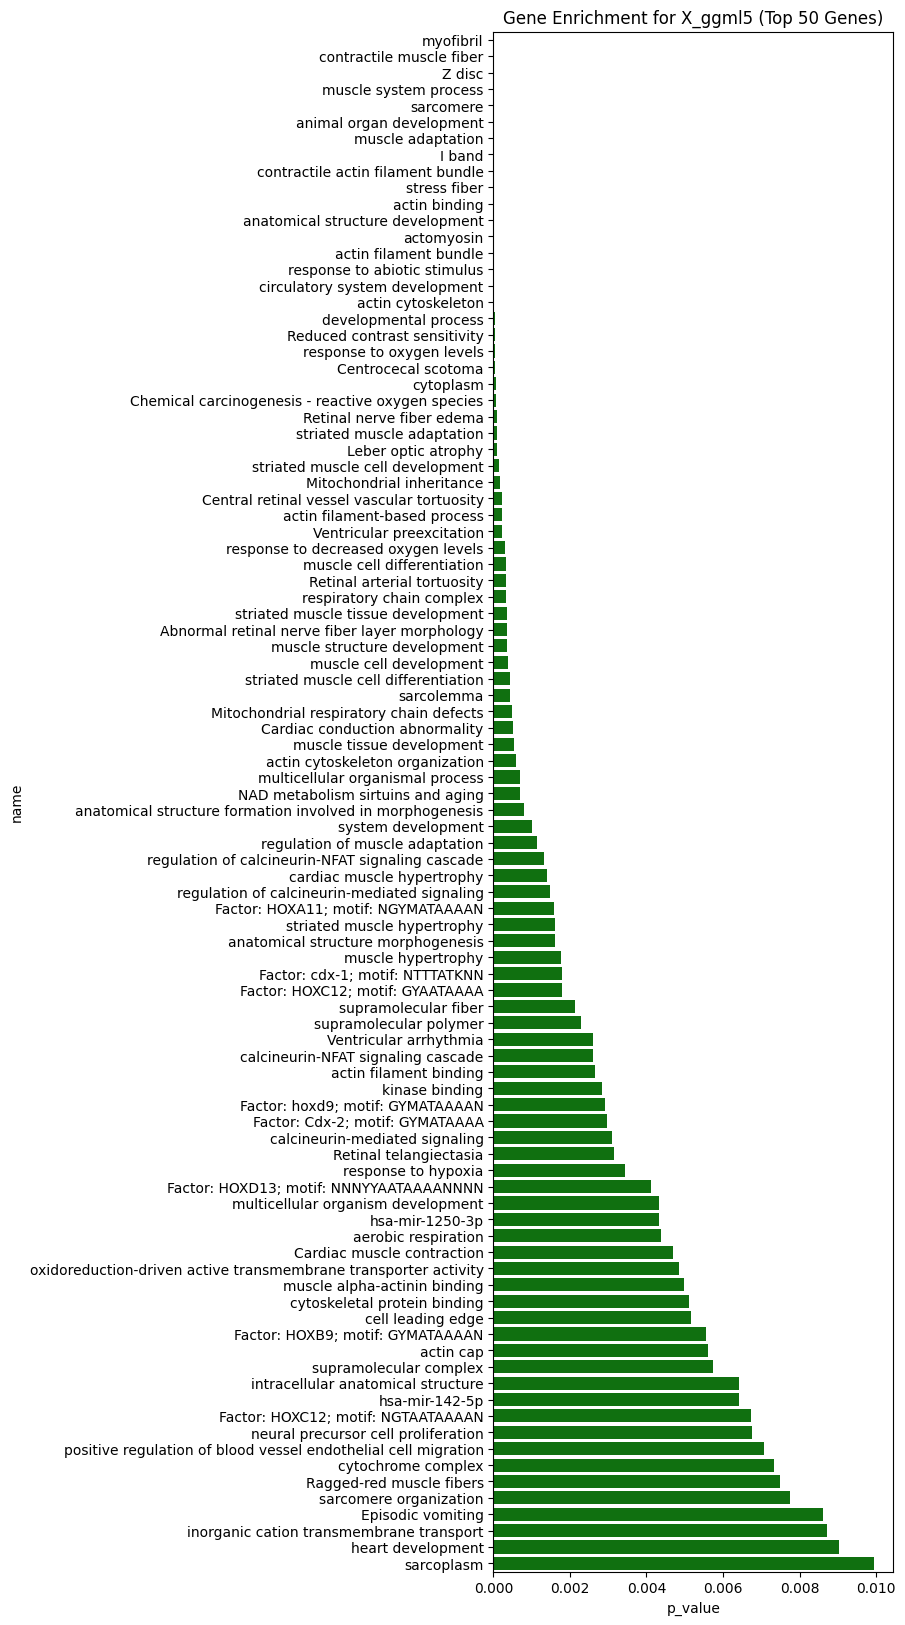

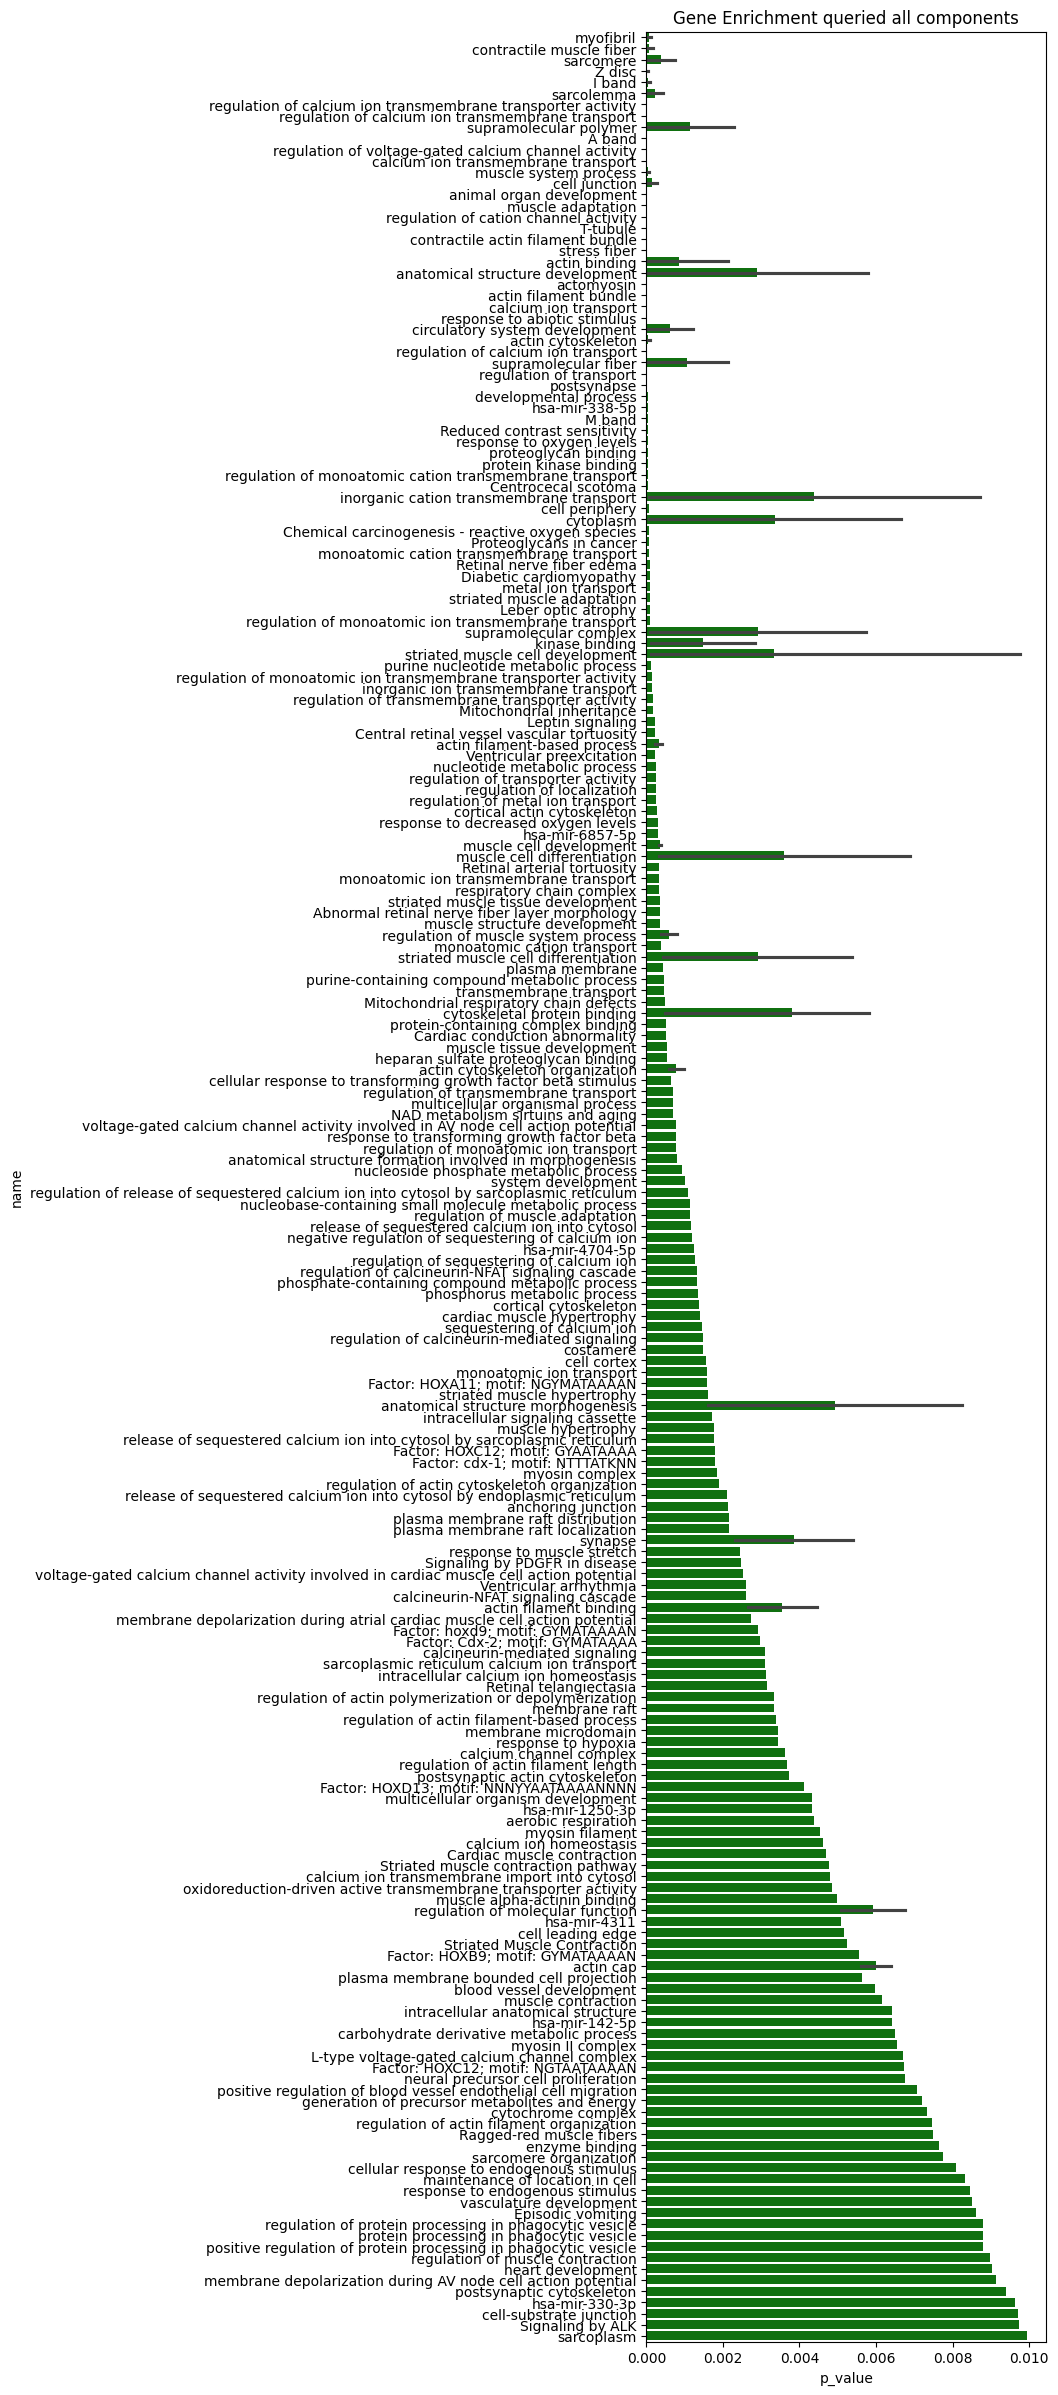

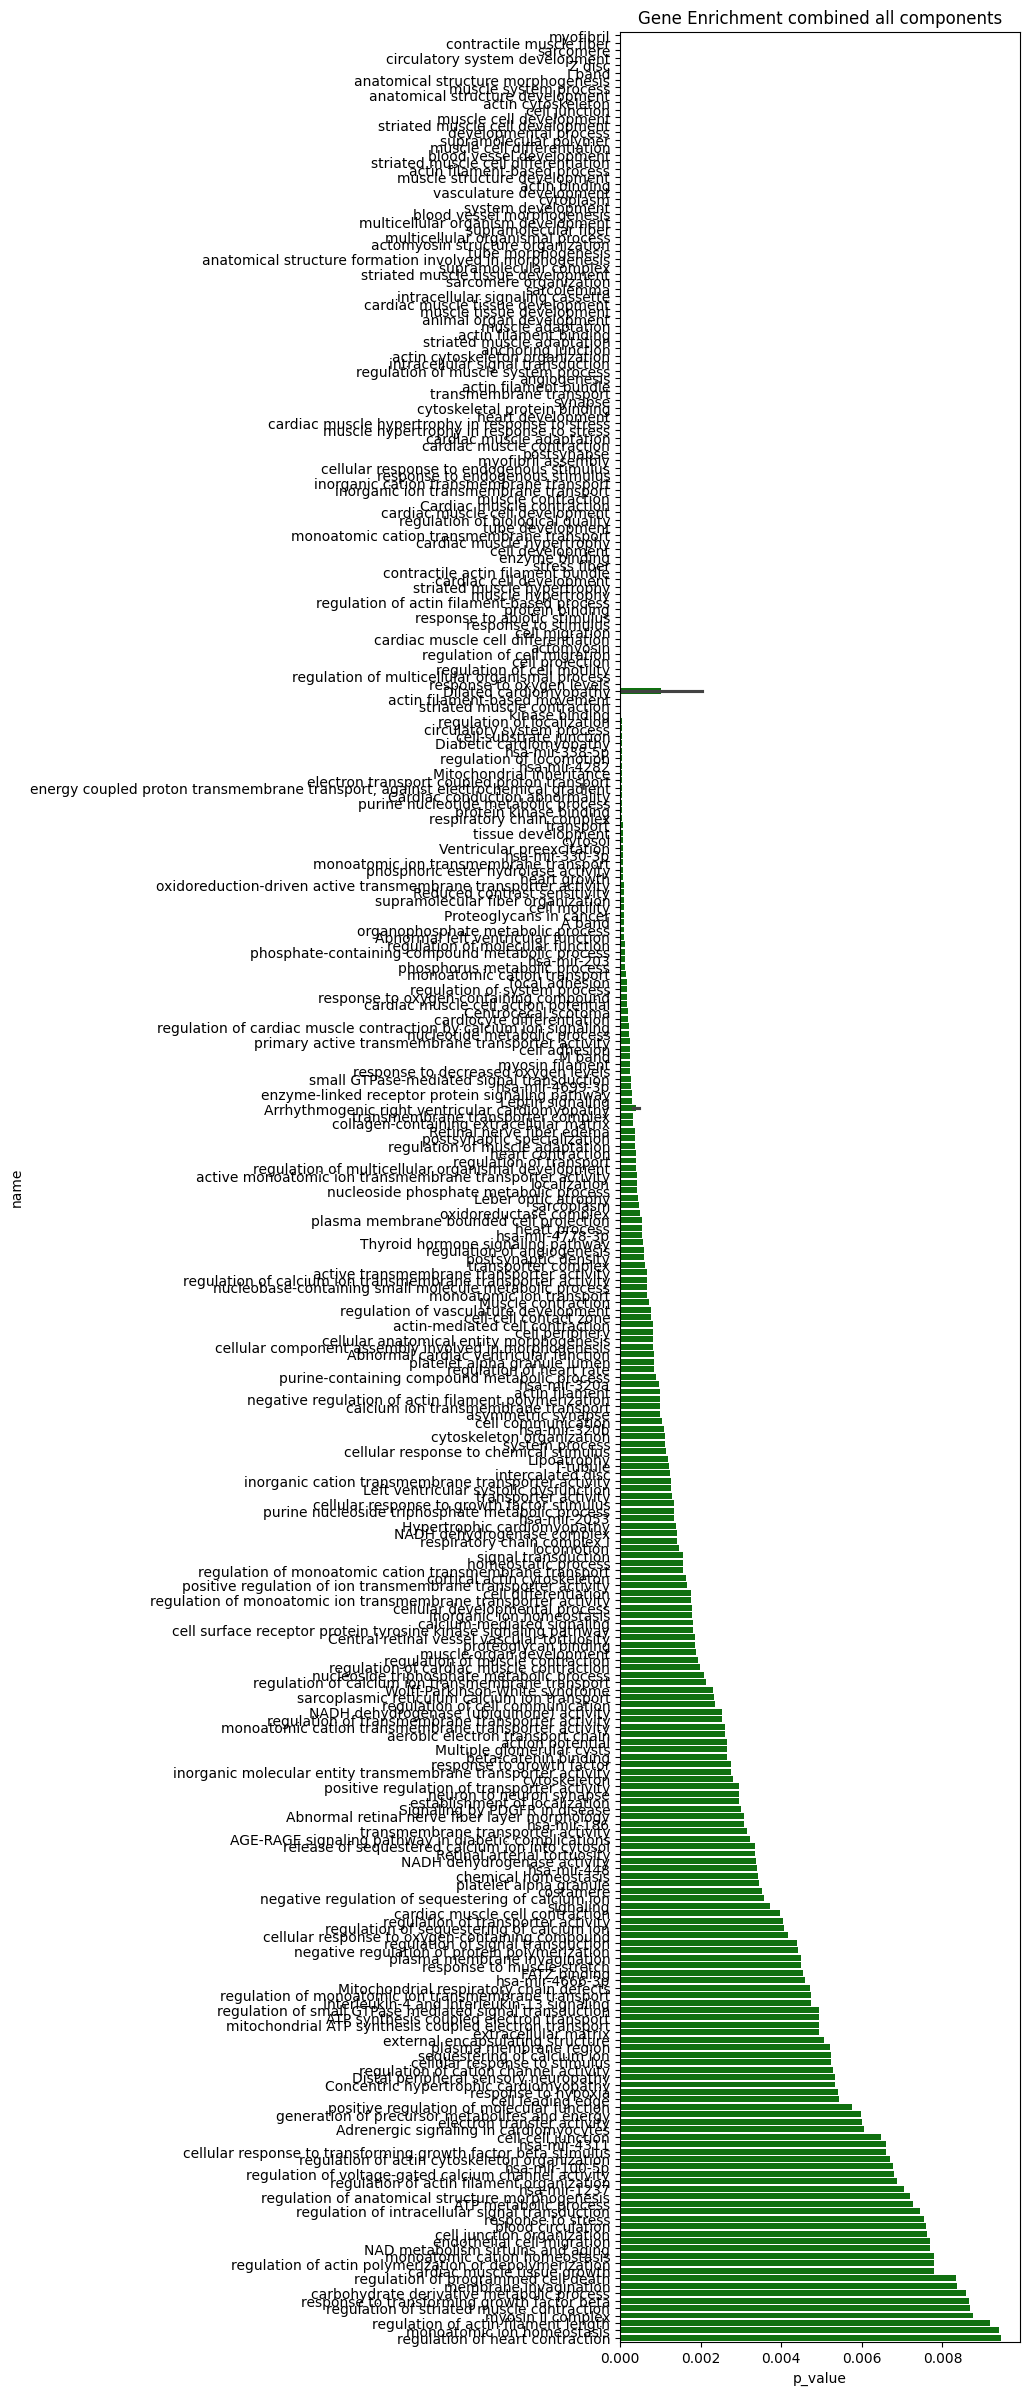

In [4]:
top_genes = ggml_ot.genes.importance(trained_adata, n_top_genes=50, plot=False)
ggml_ot.genes.enrichment(top_genes)

To see how well the model separates different types of cells or patient groups, we use UMAP for dimensionality reduction for easy plotting. We color the cells by patient groups and cell type to see if the learned space captures meaningful biological patterns.


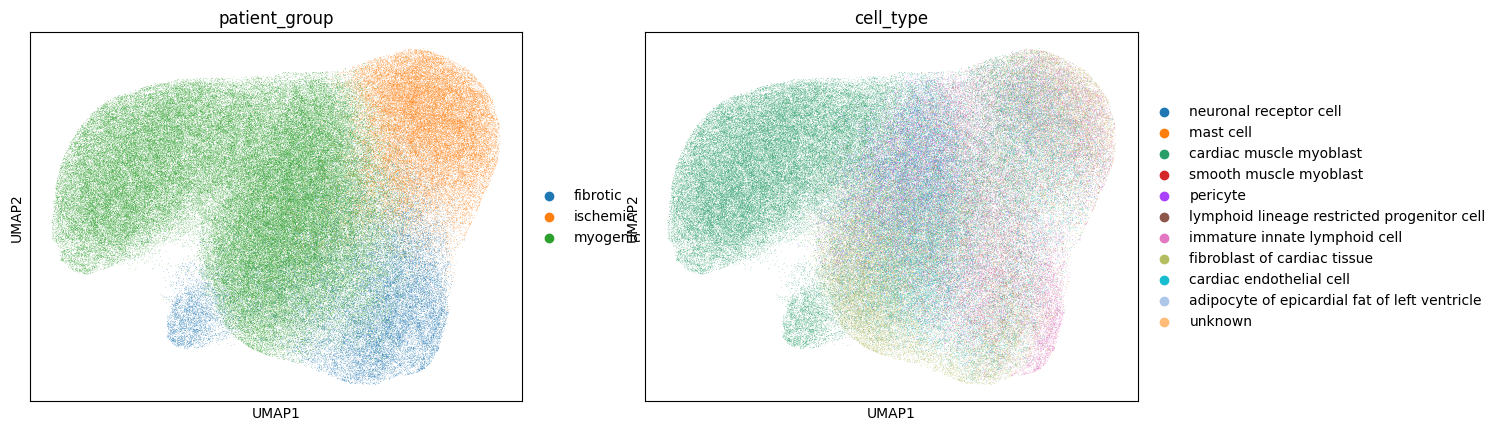

In [5]:
sc.pp.neighbors(trained_adata, use_rep="X_ggml")
sc.tl.umap(trained_adata)
sc.pl.umap(trained_adata, color=["patient_group", "cell_type"], show=True, ncols=4)